In [30]:
import sys; sys.path.append('..'); from wwa import *

# define smaller box based on observed track
xn,xx,yn,yx = [115,135,10,30]
mapproj = cartopy.crs.PlateCarree()

## Choose study region

In [22]:
df = pd.read_csv("ibtracs.since1980.list.v04r01.csv")
df = df.loc[(df.NAME == "GAEMI") & (df.SEASON == 2024)]

/var/tmp/pbs.9908534.pbs/ipykernel_2239023/1006922917.py:1: DtypeWarning: Columns (1,2,8,9,14,172,173) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("ibtracs.since1980.list.v04r01.csv")


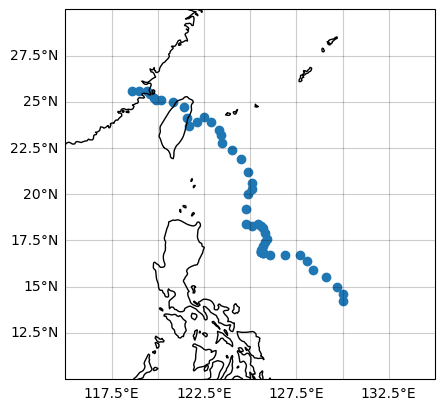

In [108]:
fig, ax = plt.subplots(subplot_kw = {"projection" : mapproj, "extent" : (xn,xx,yn,yx)})
ax.coastlines()
ax.scatter(df.LON, df.LAT)
ax.gridlines(color = "k", alpha = 0.2, draw_labels = ["left", "bottom"])

plt.savefig("fig/sst-pi-study-area.png")

In [28]:
# find box around storm track with a few degrees spare
[df.LON.min()-5, df.LON.max()+5, df.LAT.min()-5, df.LAT.max()+5]

[113.6, 135.0, 9.2, 30.6]

## Daily PI & SST over study region

In [50]:
sst = wrap_lon(xr.open_dataset("data/era5_pi/sst-daily_era5_2024.nc")).sst
pi = wrap_lon(xr.open_dataset("data/era5_pi/pi_era5_2024.nc")).vmax

In [55]:
sst_ts = sst.sel(longitude = slice(xn,xx), latitude = slice(yn,yx)).mean(["latitude", "longitude"], skipna = True)
pi_ts = pi.sel(lon = slice(xn,xx), lat = slice(yn,yx)).mean(["lat", "lon"], skipna = True)

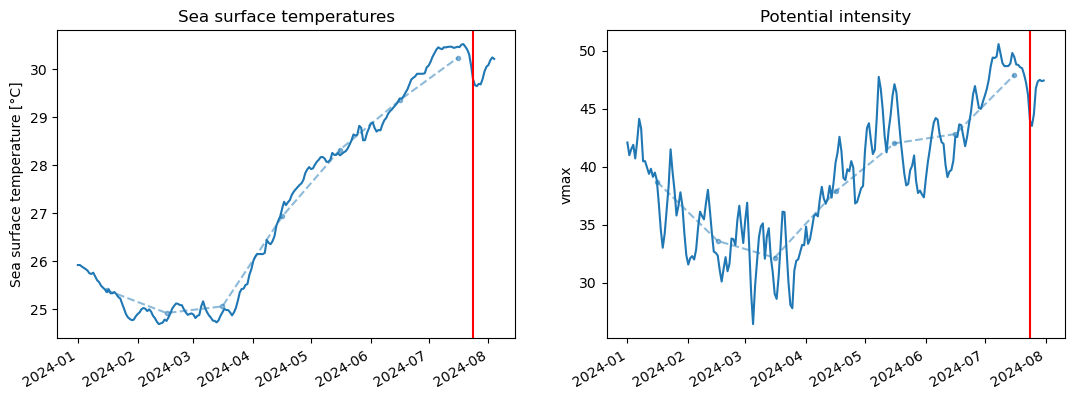

In [107]:
fig, axs = plt.subplots(ncols = 2, figsize = (13,4))

sst_ts.plot(ax = axs[0])
sst_ts.sel(time = slice(None, "2024-07")).resample(time = "MS", loffset = pd.Timedelta(15, "D")).mean().plot(ax = axs[0], ls = "--", alpha = 0.5, color = "tab:blue", marker = ".")

axs[0].set_title("Sea surface temperatures")
pi_ts.plot(ax = axs[1])
pi_ts.sel(time = slice(None, "2024-07")).resample(time = "MS", loffset = pd.Timedelta(15, "D")).mean().plot(ax = axs[1], ls = "--", alpha = 0.5, color = "tab:blue", marker = ".")

axs[1].set_title("Potential intensity")

for ax in axs:
    ax.axvline(datetime(2024,7,24), color = "red")
    ax.set_xlabel("")
    
plt.savefig("fig/sst-pi_monthly-daily.png")

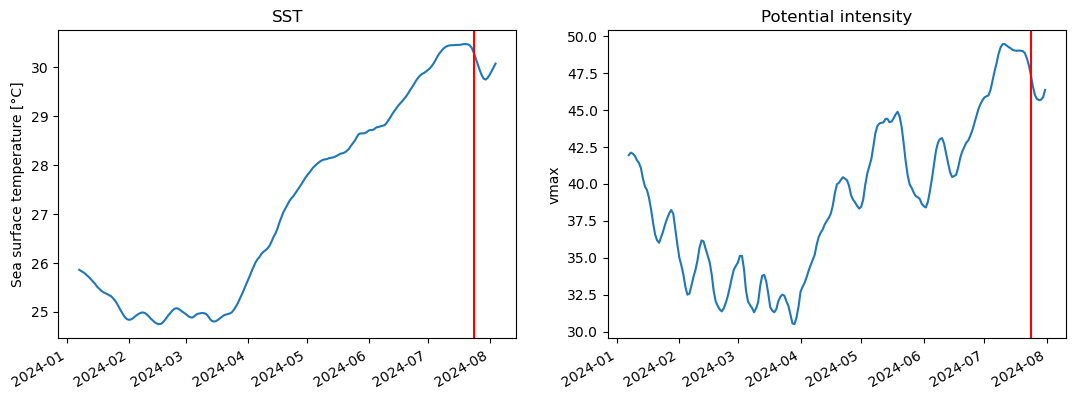

In [78]:
fig, axs = plt.subplots(ncols = 2, figsize = (13,4))

sst_ts.rolling(time = 7).mean().plot(ax = axs[0])
axs[0].set_title("SST")
pi_ts.rolling(time = 7).mean().plot(ax = axs[1])
axs[1].set_title("Potential intensity")

for ax in axs:
    ax.axvline(datetime(2024,7,24), color = "red")
    ax.set_xlabel("")

In [113]:
ds = wrap_lon(xr.open_dataset("/rds/general/user/cb2714/home/00_WWA_project_folder/ephemeral/typhoon_gaemi/mpi_vmax_mm_halfdeg_1979-2023.nc").vmax)

In [118]:
ts = ds.sel(longitude = slice(xn,xx), latitude = slice(yn,yx)).mean(["latitude", "longitude"])

In [121]:
ts.to_netcdf("data/pi_monthly_era5.nc")